In [76]:
import pandas as pd
import numpy as np
import utilities

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [77]:
LINE = 'MM15'

In [78]:
file = f'/data22/bde/Data/NYU-METS/Multivariate_Dataset/dataset/{LINE}/{LINE}.txt'

df = pd.read_csv(file, names=['bandwidth', 'LTE-neighbors', 'RSSI', 'RSRQ', 'ENodeB-change', 'time-advance', 'speed', 'band'])
#df = pd.read_csv(file, header=None)
#df.isnull().values.any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23108 entries, 0 to 23107
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bandwidth      23108 non-null  float64
 1   LTE-neighbors  23108 non-null  float64
 2   RSSI           23108 non-null  float64
 3   RSRQ           23108 non-null  float64
 4   ENodeB-change  23108 non-null  float64
 5   time-advance   23108 non-null  float64
 6   speed          23108 non-null  float64
 7   band           23108 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


In [79]:
df['bandwidth'] = pd.to_numeric(df['bandwidth'], downcast='float')
df['LTE-neighbors'] = pd.to_numeric(df['LTE-neighbors'], downcast='float')
df['RSSI'] = pd.to_numeric(df['RSSI'], downcast='float')
df['RSRQ'] = pd.to_numeric(df['RSRQ'], downcast='float')
df['ENodeB-change'] = pd.to_numeric(df['ENodeB-change'], downcast='float')
df['time-advance'] = pd.to_numeric(df['time-advance'], downcast='float')
df['speed'] = pd.to_numeric(df['speed'], downcast='float')
df['band'] = pd.to_numeric(df['band'], downcast='float')

df = utilities.reduce_mem_usage_32(df)

df['date'] = pd.date_range(start='1/1/2023', periods=len(df), freq='S')
df.head()

df.info()
#df.info(show_counts=True)
#df.head()
#df.plot(subplots=True, layout=(3,3), figsize=(40, 25))
#df.to_csv('5Gdataset-{}.csv'.format(file), encoding='utf-8', index=False)

Memory usage of dataframe is 0.71 MB
Memory usage after optimization is: 0.71 MB
Decreased by 0.0%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23108 entries, 0 to 23107
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bandwidth      23108 non-null  float32       
 1   LTE-neighbors  23108 non-null  float32       
 2   RSSI           23108 non-null  float32       
 3   RSRQ           23108 non-null  float32       
 4   ENodeB-change  23108 non-null  float32       
 5   time-advance   23108 non-null  float32       
 6   speed          23108 non-null  float32       
 7   band           23108 non-null  float32       
 8   date           23108 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float32(8)
memory usage: 902.8 KB


In [80]:
df.head()

,bandwidth,LTE-neighbors,RSSI,RSRQ,ENodeB-change,time-advance,speed,band,date
0,19.000000,5.0,0.0,67.0,14.0,1.0,0.0,1900.0,2023-01-01 00:00:00
1,15.900000,5.0,0.0,67.0,14.0,1.0,0.0,1900.0,2023-01-01 00:00:01
2,18.299999,5.0,0.0,67.0,14.0,1.0,0.0,1900.0,2023-01-01 00:00:02
3,20.799999,4.0,0.0,65.0,13.0,0.0,0.0,1900.0,2023-01-01 00:00:03
4,15.900000,4.0,0.0,65.0,13.0,0.0,0.0,1900.0,2023-01-01 00:00:04


In [81]:
df.to_csv(f'data/NYU-METS/{LINE}.csv', encoding='utf-8', index=False)

In [82]:
df['bandwidth-shifted'] = df['bandwidth'].shift(1)
tail = df.tail(4621)
tail.head()
#df['bandwidth'].tail(200).plot()

,bandwidth,LTE-neighbors,RSSI,RSRQ,ENodeB-change,time-advance,speed,band,date,bandwidth-shifted
18487,38.299999,5.0,0.0,71.0,11.0,0.0,5.60,2100.0,2023-01-01 05:08:07,38.500000
18488,34.400002,5.0,0.0,71.0,11.0,0.0,5.62,2100.0,2023-01-01 05:08:08,38.299999
18489,34.000000,6.0,0.0,70.0,13.0,0.0,5.17,2100.0,2023-01-01 05:08:09,34.400002
18490,33.200001,6.0,0.0,70.0,13.0,0.0,5.81,2100.0,2023-01-01 05:08:10,34.000000
18491,34.299999,6.0,0.0,70.0,13.0,0.0,5.53,2100.0,2023-01-01 05:08:11,33.200001


<Axes: >

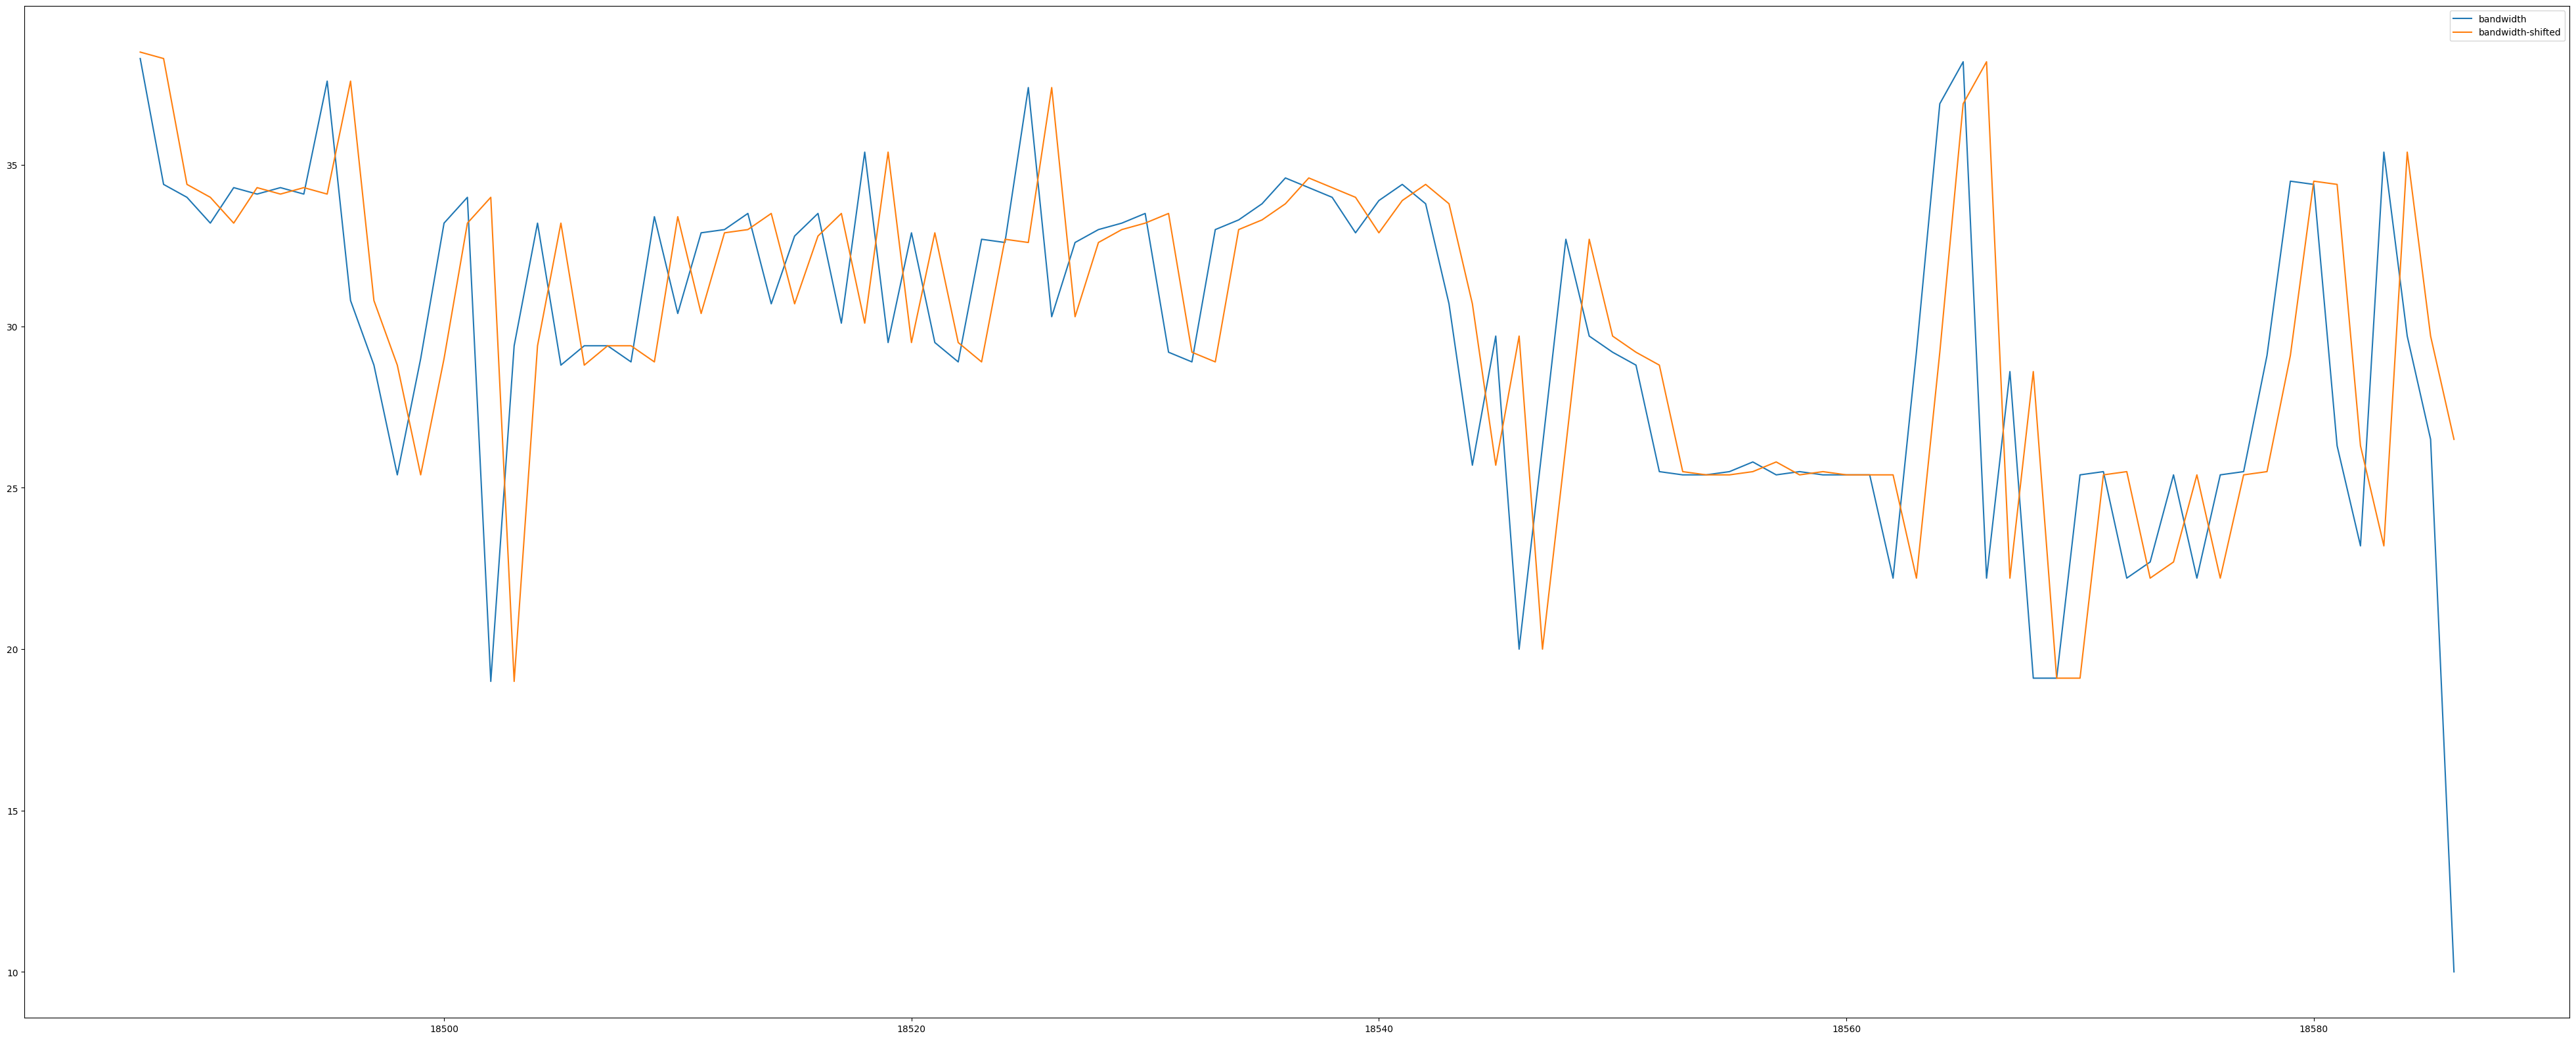

In [88]:
tail[['bandwidth', 'bandwidth-shifted']].head(100).plot(figsize=(50, 20))
#df['bandwidth'].tail(200).plot()

In [84]:
true = tail['bandwidth']
pred = tail['bandwidth-shifted']

In [85]:
mape = mean_absolute_percentage_error(true, pred)
mape

86855830000000.0

In [86]:
mse = mean_squared_error(true, pred)
mse

21.692444

In [87]:
mae = mean_absolute_error(true, pred)
mae

3.3401775